In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os

Gráfico de línea de muertes por traumatismos y por respiratorias, de 2016 a 2020

Heat map mes y año

Correlación ruralidad y tasa de mortalidad

Correlación ruralidad y tasa de mortalidad, por región

Connected dot plot, ordenado por ruralidad 

Cloropletico RM 


In [ ]:
#os.chdir("..")
#os.listdir()

In [7]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_com = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_com = defunciones_com[(defunciones_com['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_com = defunciones_com[defunciones_com.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_com.loc[defunciones_com.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_com = defunciones_com[(defunciones_com['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ') | (defunciones_com['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')]
defunciones_com = defunciones_com[['CODIGO_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_COMUNA_RESIDENCIA','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_com = (defunciones_com.groupby(by=['CODIGO_COMUNA_RESIDENCIA','GLOSA_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'CODIGO_COMUNA_RESIDENCIA':'Comuna',
                                  'GLOSA_COMUNA_RESIDENCIA' : 'Glosa Comuna',
                                  'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_com = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com = (proy_pob_com[['Comuna','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_com = (pd.melt(proy_pob_com,id_vars='Comuna',
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['Comuna','anio'])
           .sum()
           .reset_index())

proy_pob_com_rur = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com_rur = (proy_pob_com_rur[['Comuna','Area (1=Urbano 2=Rural)','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021',
                              'Area (1=Urbano 2=Rural)':'area'
               
           }))
proy_pob_com_rur = (pd.melt(proy_pob_com_rur,id_vars=['Comuna','area'],
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob_rur'
           })
           .groupby(['Comuna','anio','area'])
           .sum()
           .reset_index())
proy_pob_com_rur = proy_pob_com_rur[proy_pob_com_rur['area']==2]

proy_pob_com['anio'] = proy_pob_com['anio'].astype('int64')
proy_pob_com_rur['anio'] = proy_pob_com_rur['anio'].astype('int64')

tasa_def_com = (defunciones_com.merge(proy_pob_com,how='left',on=['Comuna','anio'])
.merge(proy_pob_com_rur[['Comuna','anio','pob_rur']],how='left',on=['Comuna','anio']))
tasa_def_com['tasa_def_com'] = tasa_def_com['n_def']/tasa_def_com['pob']*100000
tasa_def_com['tasa_rur'] = tasa_def_com['pob_rur']/tasa_def_com['pob']*100


In [8]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_nac = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_nac = defunciones_nac[(defunciones_nac['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_nac = defunciones_nac[defunciones_nac.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_nac.loc[defunciones_nac.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_nac = defunciones_nac[(defunciones_nac['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ') | (defunciones_nac['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')]
defunciones_nac = defunciones_nac[['ANO_DEF','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_nac = (defunciones_nac.groupby(by=['ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_nac = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_nac = (proy_pob_nac[['Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_nac = (pd.melt(proy_pob_nac,
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['anio'])
           .sum()
           .reset_index())

proy_pob_nac_rur = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_nac_rur = (proy_pob_nac_rur[['Area (1=Urbano 2=Rural)','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021',
                              'Area (1=Urbano 2=Rural)':'area'
               
           }))
proy_pob_nac_rur = (pd.melt(proy_pob_nac_rur,id_vars=['area'],
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob_rur'
           })
           .groupby(['anio','area'])
           .sum()
           .reset_index())
proy_pob_nac_rur = proy_pob_nac_rur[proy_pob_nac_rur['area']==2]

proy_pob_nac['anio'] = proy_pob_nac['anio'].astype('int64')
proy_pob_nac_rur['anio'] = proy_pob_nac_rur['anio'].astype('int64')

tasa_def_nac = (defunciones_nac.merge(proy_pob_nac,how='left',on=['anio'])
.merge(proy_pob_nac_rur[['anio','pob_rur']],how='left',on=['anio']))
tasa_def_nac['tasa_def_nac'] = tasa_def_nac['n_def']/tasa_def_nac['pob']*100000
tasa_def_nac['tasa_rur'] = tasa_def_nac['pob_rur']/tasa_def_nac['pob']*100


In [9]:
tab1 = tasa_def_nac.pivot_table(values="tasa_def_nac",index=["causa"],columns = "anio", aggfunc=sum)

In [10]:
tab1

anio                                                     2016      2017  \
causa                                                                     
Enfermedades del sistema respiratorio               54.202237  58.96567   
Traumatismos, envenenamientos y algunas otras c...  42.786025  41.14187   

anio                                                     2018       2019  \
causa                                                                      
Enfermedades del sistema respiratorio               65.211114  72.558975   
Traumatismos, envenenamientos y algunas otras c...  41.106253  42.209184   

anio                                                      2020        2021  
causa                                                                       
Enfermedades del sistema respiratorio               165.029748  196.586474  
Traumatismos, envenenamientos y algunas otras c...   40.332382   39.540891

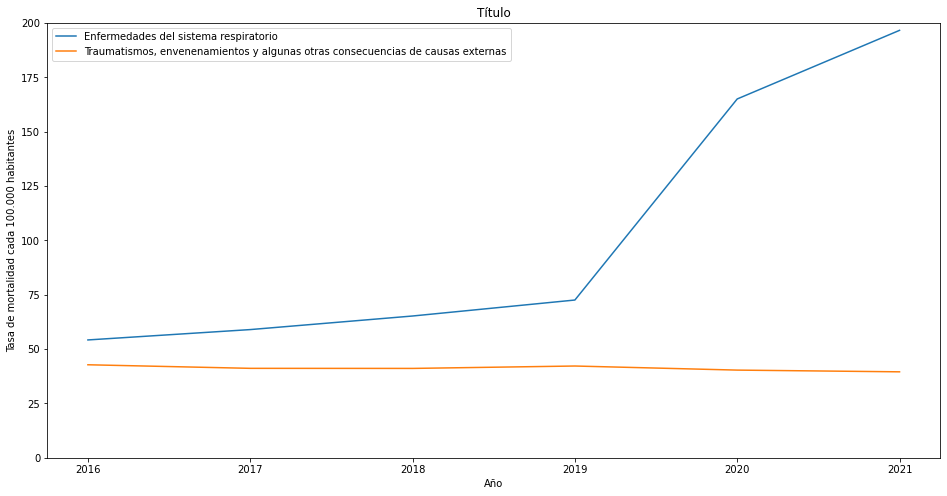

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab1.index:
    tab1.loc[year].plot.line(ax=ax)

plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 200)

plt.show()

In [12]:
tab2 = tasa_def_com.pivot_table("tasa_def_com",index=["Glosa Comuna", "causa"], columns = "anio",aggfunc=sum)
tab2

anio                                                                  2016  \
Glosa Comuna causa                                                           
Aisén        Enfermedades del sistema respiratorio               40.831326   
             Traumatismos, envenenamientos y algunas otras c...  73.496386   
Algarrobo    Enfermedades del sistema respiratorio               35.942779   
             Traumatismos, envenenamientos y algunas otras c...  35.942779   
Alhué        Enfermedades del sistema respiratorio               44.856459   
...                                                                    ...   
Zapallar     Traumatismos, envenenamientos y algunas otras c...  26.705835   
Ñiquén       Enfermedades del sistema respiratorio               43.387713   
             Traumatismos, envenenamientos y algunas otras c...  52.065255   
Ñuñoa        Enfermedades del sistema respiratorio               62.895990   
             Traumatismos, envenenamientos y algunas otras c...  32.372936   

anio                                                                  2017  \
Glosa Comuna causa                                                           
Aisén        Enfermedades del sistema respiratorio               64.979897   
             Traumatismos, envenenamientos y algunas otras c...  77.163628   
Algarrobo    Enfermedades del sistema respiratorio               77.350397   
             Traumatismos, envenenamientos y algunas otras c...  21.095563   
Alhué        Enfermedades del sistema respiratorio                     NaN   
...                                                                    ...   
Zapallar     Traumatismos, envenenamientos y algunas otras c...  52.583147   
Ñiquén       Enfermedades del sistema respiratorio               43.357614   
             Traumatismos, envenenamientos y algunas otras c...  60.700659   
Ñuñoa        Enfermedades del sistema respiratorio               71.153543   
             Traumatismos, envenenamientos y algunas otras c...  24.318300   

anio                                                                  2018  \
Glosa Comuna causa                                                           
Aisén        Enfermedades del sistema respiratorio               28.283971   
             Traumatismos, envenenamientos y algunas otras c...  64.649077   
Algarrobo    Enfermedades del sistema respiratorio               68.761604   
             Traumatismos, envenenamientos y algunas otras c...  27.504641   
Alhué        Enfermedades del sistema respiratorio               56.963828   
...                                                                    ...   
Zapallar     Traumatismos, envenenamientos y algunas otras c...  90.497738   
Ñiquén       Enfermedades del sistema respiratorio               86.625087   
             Traumatismos, envenenamientos y algunas otras c...  77.962578   
Ñuñoa        Enfermedades del sistema respiratorio               74.954074   
             Traumatismos, envenenamientos y algunas otras c...  26.862154   

anio                                                                   2019  \
Glosa Comuna causa                                                            
Aisén        Enfermedades del sistema respiratorio                92.443730   
             Traumatismos, envenenamientos y algunas otras c...  104.501608   
Algarrobo    Enfermedades del sistema respiratorio                67.281168   
             Traumatismos, envenenamientos y algunas otras c...   47.096818   
Alhué        Enfermedades del sistema respiratorio                69.309676   
...                                                                     ...   
Zapallar     Traumatismos, envenenamientos y algunas otras c...   12.712942   
Ñiquén       Enfermedades del sistema respiratorio                43.267567   
             Traumatismos, envenenamientos y algunas otras c...   51.921080   
Ñuñoa        Enfermedades del sistema respiratorio                97.610414   
       

In [13]:
tasa_def_com_2017_2021 = tasa_def_com[(tasa_def_com["anio"]==2017) | (tasa_def_com["anio"]==2021)]

tab3 = tasa_def_com_2017_2021.pivot_table("tasa_def_com",index=["Glosa Comuna", "causa"], columns = "anio",aggfunc=sum)
tab3

anio                                                                  2017  \
Glosa Comuna causa                                                           
Aisén        Enfermedades del sistema respiratorio               64.979897   
             Traumatismos, envenenamientos y algunas otras c...  77.163628   
Algarrobo    Enfermedades del sistema respiratorio               77.350397   
             Traumatismos, envenenamientos y algunas otras c...  21.095563   
Alhué        Enfermedades del sistema respiratorio                     NaN   
...                                                                    ...   
Zapallar     Traumatismos, envenenamientos y algunas otras c...  52.583147   
Ñiquén       Enfermedades del sistema respiratorio               43.357614   
             Traumatismos, envenenamientos y algunas otras c...  60.700659   
Ñuñoa        Enfermedades del sistema respiratorio               71.153543   
             Traumatismos, envenenamientos y algunas otras c...  24.318300   

anio                                                                   2021  
Glosa Comuna causa                                                           
Aisén        Enfermedades del sistema respiratorio               155.471397  
             Traumatismos, envenenamientos y algunas otras c...   75.742476  
Algarrobo    Enfermedades del sistema respiratorio               265.612853  
             Traumatismos, envenenamientos y algunas otras c...   38.870174  
Alhué        Enfermedades del sistema respiratorio               172.505308  
...                                                                     ...  
Zapallar     Traumatismos, envenenamientos y algunas otras c...   24.691358  
Ñiquén       Enfermedades del sistema respiratorio               207.522698  
             Traumatismos, envenenamientos y algunas otras c...   77.821012  
Ñuñoa        Enfermedades del sistema respiratorio               161.048850  
             Traumatismos, envenenamientos y algunas otras c...   14.854020  

[668 rows x 2 columns]

In [ ]:
#https://stats.stackexchange.com/questions/423735/what-is-the-name-of-this-plot-that-has-rows-with-two-connected-dots

In [ ]:
#tab3['delta'] = tab3["2021"] / tab3["2017"] - 1

In [14]:
import seaborn as sns
plt.figure(figsize=(12,6))

y_range = np.arange(1, len(tab3.index) + 1)
colors = np.where(tab3['2021'] > tab3['2017'], '#d9d9d9', '#d57883')

plt.hlines(y=y_range, xmin=tab3['2017'], xmax=tab3['2021'],
           color=colors, lw=10)
plt.scatter(tab3['2017'], y_range, color='#0096d7', s=200, label='2017', zorder=3)
plt.scatter(tab3['2021'], y_range, color='#003953', s=200 , label='2021', zorder=3)

#for (_, row), y in zip(df.iterrows(), y_range):
    #plt.annotate(f"{row['delta']:+.0%}", (max(row["2017"], row["2021"]) + 4, y - 0.25))
#plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, tab3.index)
plt.title(" prueba", loc='left')
plt.xlim(50, 300)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()

KeyError: '2021'

<Figure size 864x432 with 0 Axes>